In [3]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from utils import*
from pysift import get_sift_points


In [4]:
img_1 = 'assignment/pair1/000006.png'
img_2 = 'assignment/pair1/000007.png'


In [2]:
string = "assignment/pair1/K.txt"
result = string[:string.rfind('/') + 1]
result


'assignment/pair1/'

In [5]:
# x2d_0, x2d_1 = get_sift_points(img_1, img_2)
data = np.load("assignment/pair1/data.npz")
x2d_0 = data['x2d_0']
x2d_1 = data['x2d_1']
print(x2d_0)

[[ 594.84455279  987.59363994]
 [   8.46389971 1209.91461417]
 [ 419.25425162   43.81932476]
 ...
 [ 975.90274262  450.82718935]
 [ 888.08209963  529.33576063]
 [ 739.9499023   554.28907395]]


In [6]:
print(x2d_1)

[[   7.9794953  2444.80784576]
 [   8.42067408 2702.94678865]
 [  11.49769968 2574.82511052]
 ...
 [ 229.77824223 1899.67805973]
 [ 564.68426361 2436.50236839]
 [ 946.40992118 1877.96531199]]


In [7]:
# np.savez('assignment/pair1/data.npz', x2d_0=x2d_0, x2d_1=x2d_1)


In [8]:
F_est =eight_point_algo(x2d_0, x2d_1)
F_est/= F_est[2,2]
print('F矩阵: ', F_est)

F矩阵:  [[ 5.79219359e-08  2.82450883e-08 -8.64629155e-05]
 [ 1.93287271e-07  2.24239327e-07 -3.81320786e-04]
 [-5.17980261e-04 -5.70275184e-04  1.00000000e+00]]


In [9]:
K0 = np.loadtxt('assignment/pair1/K.txt', delimiter=',')
K0

array([2892.33032227, 2883.17504883,  823.2052002 ,  619.07086182])

In [10]:
def build_K(K):
    a = np.zeros((3,3))
    a[0][0] = K[0]
    a[0][2] = K[2]
    a[1][1] = K[1]
    a[1][2] = K[3]
    a[2][2] = 1
    return a

In [11]:
K = build_K(K0)
print(K)

[[2.89233032e+03 0.00000000e+00 8.23205200e+02]
 [0.00000000e+00 2.88317505e+03 6.19070862e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [12]:
E = essential_from_fundamental(F_est, K)
E

array([[ 18.59219886, -11.69075324,  -1.68184346],
       [  9.8720854 ,  15.69663705,  -1.61319589],
       [ -6.01542642, -10.08221315,   1.        ]])

In [13]:
R0, R1, T0, T1 = compute_rotation_translation(E)
R = R1@R0.T
T = (T1-R@T0).flatten()
print(R,T)

[[-0.99977517 -0.01134071 -0.01791665]
 [-0.01134071 -0.42797119  0.90372122]
 [-0.01791665  0.90372122  0.42774636]] [-0.02120539  1.06960629  1.68982032]


In [14]:
points_3D = triangulate_dlt(K, R, T, x2d_0 , x2d_1)

In [15]:
print(points_3D)

[[ 0.19318369 -0.26640087 -0.63677943]
 [ 0.24988593 -0.34532391 -0.65515946]
 [ 0.22804878 -0.09152554 -0.1294538 ]
 ...
 [ 0.13220304 -0.02156995 -0.51141683]
 [ 0.06478416 -0.00386345 -0.01259452]
 [-0.03187985  0.00602793 -0.45948338]]


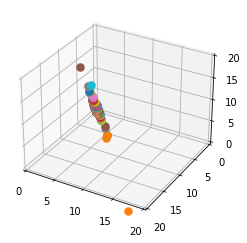

In [16]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure()  # 得到画面
ax1 = plt.axes(projection='3d')
ax1.set_xlim(0, 20)  # X轴，横向向右方向
ax1.set_ylim(20, 0)  # Y轴,左向与X,Z轴互为垂直
ax1.set_zlim(0, 20)  # 竖向为Z轴

i = 0
for x in points_3D:
    ax1.scatter(x[0], x[1], x[2],  linewidths=4)  # 用散点函数画点
    i += 1
plt.show()
